# Regression on Boston Dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']  # Alternative: InlineBackend.figure_format = 'retina'

import seaborn as sns; sns.set(palette='dark') # deep, muted, bright, pastel, dark, colorblind; hls, husl.
import numpy as np
import pandas as pd

from sklearn import datasets

### Load Boston dataset

In [2]:
boston = datasets.load_boston()

### Explore the data

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.data.shape

(506, 13)

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
bdf = pd.DataFrame(boston.data)
bdf.columns = np.char.lower(boston.feature_names)
bdf['price'] = boston.target

bdf.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bdf.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Visualizing price vs. features

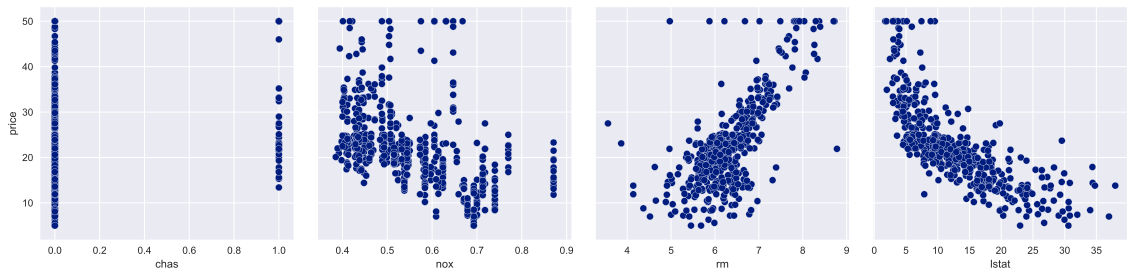

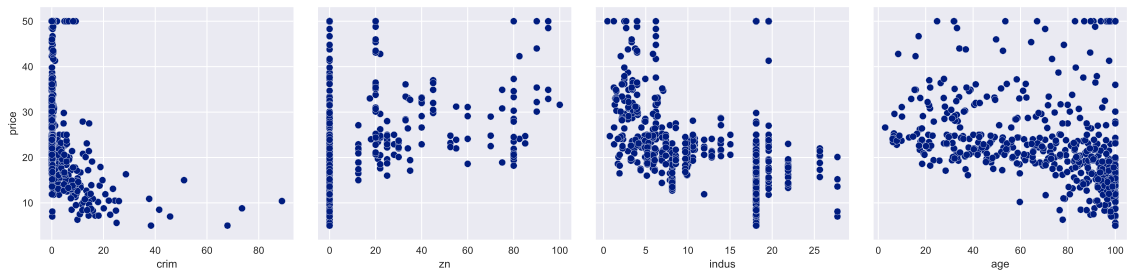

In [9]:
sns.pairplot(bdf, x_vars=['chas','nox', 'rm', 'lstat'], y_vars='price', size=4)
sns.pairplot(bdf, x_vars=['crim', 'zn', 'indus', 'age'], y_vars='price', size=4)

### Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

### LinearRegression with default hyperparameters

Fit a model on train

In [11]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_train)
lrm.intercept_, lrm.coef_

(38.157100868614094,
 array([-9.77989795e-02,  3.48169394e-02, -1.62271160e-02,  3.36400909e+00,
        -1.61858951e+01,  3.56478301e+00,  4.63566628e-03, -1.39638426e+00,
         3.15813151e-01, -1.20424195e-02, -1.04955909e+00,  1.15421153e-02,
        -5.53387328e-01]))

Model score (R^2) on train and test

In [12]:
print(f'Training R^2 = {lrm.score(x_train, y_train):.2f}, Testing R^2 = {lrm.score(x_test, y_test):.2f}')

Training R^2 = 0.73, Testing R^2 = 0.75


#### Predict on test, print MAE and MSE on test

In [13]:
y_test_pred = lrm.predict(x_test)
y_test_pred[:10]

array([22.68494316, 21.57403812, 33.43894602, 31.45093845,  3.25963013,
        3.17693863, 27.25113837, 22.04725093, 15.00574731, 21.39233899])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calc_metrics(model, name):
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  metrics = [name, r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)]
  metrics += [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)]
  metrics += [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)]
  cols = ['Model', 'R^2 test', 'R^2 train', 'MAE test', 'MAE train', 'MSE test', 'MSE train']
  return pd.DataFrame(data=[metrics], columns=cols)

In [15]:
mm = calc_metrics(lrm, 'Linear Regression, normalize = False')
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 150

mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04


#### Plot test predictions

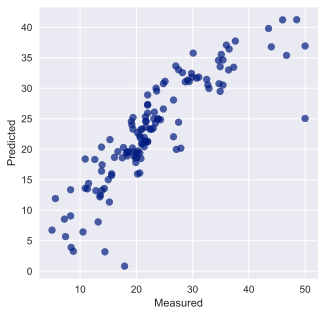

In [16]:
plt.figure(figsize=(5,5)) 
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.scatter(y_test, y_test_pred, alpha=0.7)

#### Display model coefficients

In [17]:
pd.DataFrame(lrm.coef_[np.newaxis], columns=np.char.lower(boston.feature_names), index = ['Coefficients'])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
Coefficients,-0.10,0.03,-0.02,3.36,-16.19,3.56,0.00,-1.40,0.32,-0.01,-1.05,0.01,-0.55


### Linear Regression with normalization

In [18]:
lrmn = LinearRegression(normalize=True)
lrmn

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
lrmn.fit(x_train, y_train)
mm = mm.append(calc_metrics(lrmn, 'Linear Regression, normalize = True'), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04


### LinearRegression with PolynomialFeatures (n=2)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
lrpf2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
lrpf2.fit(x_train, y_train)
lrpf2.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [21]:
mm = mm.append(calc_metrics(lrpf2, 'Linear Regression with Polynomial Features (2)'), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56


### LinearRegression with PolynomialFeatures (n=3)

In [22]:
lrpf3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
lrpf3.fit(x_train, y_train)
mm = mm.append(calc_metrics(lrpf3, 'Linear Regression with Polynomial Features (3)'), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56
3,Linear Regression with Polynomial Features (3),-2394.68,1.00,182.74,0.00,212620.33,0.00


### For Ridge and Lasso try different alpha (e.g. 0.1, 1, 10, 100)

### Ridge with PolynomialFeatures (n=2)

In [23]:
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

def calc_poly_metrics(n, alpha):
  poly = make_pipeline(PolynomialFeatures(n), Ridge(alpha=alpha))
  poly.fit(x_train, y_train)
  return calc_metrics(poly, f'Ridge with Polynomial Features, n = {n}, alpha = {alpha}')

In [24]:
mm = mm.append(calc_poly_metrics(2, 0.1), ignore_index=True)
mm = mm.append(calc_poly_metrics(2, 1), ignore_index=True)
mm = mm.append(calc_poly_metrics(2, 10), ignore_index=True)
mm = mm.append(calc_poly_metrics(2, 100), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56
3,Linear Regression with Polynomial Features (3),-2394.68,1.00,182.74,0.00,212620.33,0.00
4,"Ridge with Polynomial Features, n = 2, alpha = 0.1",0.84,0.94,2.52,1.69,13.87,4.93
5,"Ridge with Polynomial Features, n = 2, alpha = 1",0.85,0.94,2.42,1.75,13.46,5.31
6,"Ridge with Polynomial Features, n = 2, alpha = 10",0.87,0.93,2.31,1.84,11.80,6.02
7,"Ridge with Polynomial Features, n = 2, alpha = 100",0.86,0.91,2.39,1.96,12.17,7.25


In [25]:
mm = mm.append(calc_poly_metrics(3, 0.1), ignore_index=True)
mm = mm.append(calc_poly_metrics(3, 1), ignore_index=True)
mm = mm.append(calc_poly_metrics(3, 10), ignore_index=True)
mm = mm.append(calc_poly_metrics(3, 100), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56
3,Linear Regression with Polynomial Features (3),-2394.68,1.00,182.74,0.00,212620.33,0.00
4,"Ridge with Polynomial Features, n = 2, alpha = 0.1",0.84,0.94,2.52,1.69,13.87,4.93
5,"Ridge with Polynomial Features, n = 2, alpha = 1",0.85,0.94,2.42,1.75,13.46,5.31
6,"Ridge with Polynomial Features, n = 2, alpha = 10",0.87,0.93,2.31,1.84,11.80,6.02
7,"Ridge with Polynomial Features, n = 2, alpha = 100",0.86,0.91,2.39,1.96,12.17,7.25
8,"Ridge with Polynomial Features, n = 3, alpha = 0.1",-0.69,0.99,6.70,0.74,150.40,1.11
9,"Ridge with Polynomial Features, n = 3, alpha = 1",-0.75,0.98,6.76,0.83,155.40,1.26


### Lasso with PolynomialFeatures (n=2)

In [26]:
from sklearn.linear_model import Lasso
poly = make_pipeline(PolynomialFeatures(...), Lasso(alpha=..., tol=0.1))

def calc_lasso_metrics(n, alpha):
  lasso = make_pipeline(PolynomialFeatures(n), Lasso(alpha=alpha, tol=0.1))
  lasso.fit(x_train, y_train)
  return calc_metrics(lasso, f'Lasso with Polynomial Features, n = {n}, alpha = {alpha}')

In [27]:
mm = mm.append(calc_lasso_metrics(2, 0.1), ignore_index=True)
mm = mm.append(calc_lasso_metrics(2, 1), ignore_index=True)
mm = mm.append(calc_lasso_metrics(2, 10), ignore_index=True)
mm = mm.append(calc_lasso_metrics(2, 100), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56
3,Linear Regression with Polynomial Features (3),-2394.68,1.00,182.74,0.00,212620.33,0.00
4,"Ridge with Polynomial Features, n = 2, alpha = 0.1",0.84,0.94,2.52,1.69,13.87,4.93
5,"Ridge with Polynomial Features, n = 2, alpha = 1",0.85,0.94,2.42,1.75,13.46,5.31
6,"Ridge with Polynomial Features, n = 2, alpha = 10",0.87,0.93,2.31,1.84,11.80,6.02
7,"Ridge with Polynomial Features, n = 2, alpha = 100",0.86,0.91,2.39,1.96,12.17,7.25
8,"Ridge with Polynomial Features, n = 3, alpha = 0.1",-0.69,0.99,6.70,0.74,150.40,1.11
9,"Ridge with Polynomial Features, n = 3, alpha = 1",-0.75,0.98,6.76,0.83,155.40,1.26


In [28]:
mm = mm.append(calc_lasso_metrics(3, 0.1), ignore_index=True)
mm = mm.append(calc_lasso_metrics(3, 1), ignore_index=True)
mm = mm.append(calc_lasso_metrics(3, 10), ignore_index=True)
mm = mm.append(calc_lasso_metrics(3, 100), ignore_index=True)
mm = mm.append(calc_lasso_metrics(3, 1000), ignore_index=True)
mm

,Model,R^2 test,R^2 train,MAE test,MAE train,MSE test,MSE train
0,"Linear Regression, normalize = False",0.75,0.73,3.24,3.34,22.18,22.04
1,"Linear Regression, normalize = True",0.75,0.73,3.24,3.34,22.18,22.04
2,Linear Regression with Polynomial Features (2),0.81,0.95,2.75,1.62,16.78,4.56
3,Linear Regression with Polynomial Features (3),-2394.68,1.00,182.74,0.00,212620.33,0.00
4,"Ridge with Polynomial Features, n = 2, alpha = 0.1",0.84,0.94,2.52,1.69,13.87,4.93
5,"Ridge with Polynomial Features, n = 2, alpha = 1",0.85,0.94,2.42,1.75,13.46,5.31
6,"Ridge with Polynomial Features, n = 2, alpha = 10",0.87,0.93,2.31,1.84,11.80,6.02
7,"Ridge with Polynomial Features, n = 2, alpha = 100",0.86,0.91,2.39,1.96,12.17,7.25
8,"Ridge with Polynomial Features, n = 3, alpha = 0.1",-0.69,0.99,6.70,0.74,150.40,1.11
9,"Ridge with Polynomial Features, n = 3, alpha = 1",-0.75,0.98,6.76,0.83,155.40,1.26
